In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests
import pandas as pd
from io import BytesIO

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

# prepare image and text prompt, using the appropriate prompt template
url= f'https://i.pinimg.com/564x/{image[:2]}/{image[2:4]}/{image[4:6]}/{image}.jpg'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Referer': 'https://www.pinterest.com/',
}

with requests.Session() as session:
    response = session.get(url, headers=headers, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.show()

# Define a chat histiry and use `apply_chat_template` to get correctly formatted prompt
# Each value in "content" has to be a list of dicts with types ("text", "image") 
conversation = [
    {

      "role": "user",
      "content": [
          {"type": "text", "text": "What is shown in this image?"},
          {"type": "image"},
        ],
    },
]
prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

inputs = processor(prompt, img, return_tensors="pt").to("cuda:0")

# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=250)

print(processor.decode(output[0], skip_special_tokens=True))


/home/hadi/.conda/envs/VLM/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  8.40it/s]


NameError: name 'image' is not defined

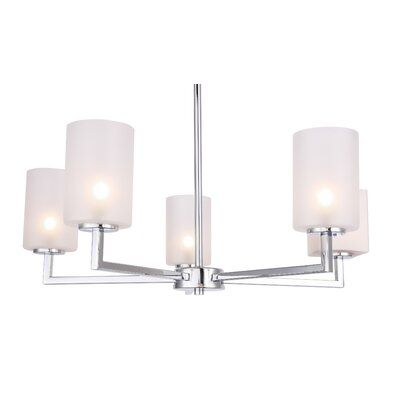

In [2]:
import requests
import PIL
from PIL import Image
from io import BytesIO

def fetch_and_open_image(image_id):
    try:
        url = f'https://i.pinimg.com/564x/{image_id[:2]}/{image_id[2:4]}/{image_id[4:6]}/{image_id}.jpg'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Referer': 'https://www.pinterest.com/',
        }
        
        with requests.Session() as session:
            response = session.get(url, headers=headers, stream=True)
        
            # Check if the request was successful
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                img.show()
            elif response.status_code == 403:
                print("Access forbidden: You do not have permission to access this resource.")
            else:
                print(f"Failed to retrieve image. HTTP Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
    except PIL.UnidentifiedImageError:
        print("Cannot identify image file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
image_id = "95b78e75af5a77f3aead0bb4607c2e75"
fetch_and_open_image(image_id)


In [3]:
df=pd.read_csv('Subsampled_eval_dataset.csv')
title=df['title']
description=df['description']
images=df['image_signature']

In [4]:
images[0]

'95b78e75af5a77f3aead0bb4607c2e75'

In [5]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

# prepare image and text prompt, using the appropriate prompt template
url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
print(url)
image = Image.open(requests.get(url, stream=True).raw)
print(image)

# Define a chat histiry and use `apply_chat_template` to get correctly formatted prompt
# Each value in "content" has to be a list of dicts with types ("text", "image") 
conversation = [
    {

      "role": "user",
      "content": [
          {"type": "text", "text": "What is shown in this image?"},
          {"type": "image"},
        ],
    },
]
prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))


Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x899 at 0x7FEC769E0E00>


We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


[INST]  
What is shown in this image? [/INST] The image appears to be a radar chart, which is a type of multi-dimensional plot that displays values for multiple quantitative variables represented on axes starting from the same point. This particular radar chart is showing the performance of different models or systems across various metrics.

The axes represent different metrics or benchmarks, such as MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-


: 

/home/haskari/miniconda3/envs/pinterest/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


what


0it [00:00, ?it/s]

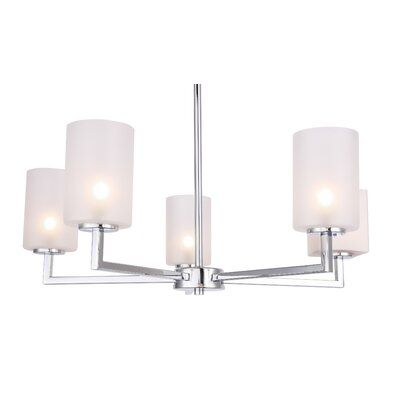

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
0it [00:00, ?it/s]


ValueError: Number of image tokens in input_ids (0) different from num_images (1).

Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]
0it [00:00, ?it/s]

https://i.pinimg.com/564x/e9/2c/28/e92c2830fa79e2fe0e8855db2094f1c7.jpg


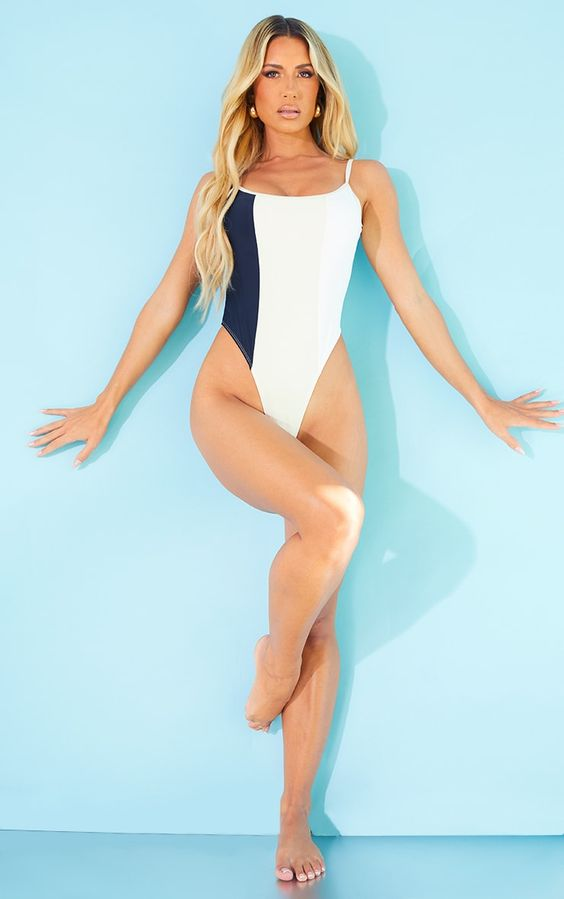

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
1it [00:00,  1.18it/s]


ValueError: Number of image tokens in input_ids (0) different from num_images (1).

: 

In [3]:
from transformers import pipeline
from tqdm.auto import tqdm
import pickle as pkl
from transformers import AutoModelForCausalLM, AutoTokenizer
import pandas as pd
import json
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests
from io import BytesIO
import PIL
import base64

def fetch_and_open_image(image_id):
    try:
        url = f'https://i.pinimg.com/564x/{image_id[:2]}/{image_id[2:4]}/{image_id[4:6]}/{image_id}.jpg'
        print(url)
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Referer': 'https://www.pinterest.com/',
        }
        
        with requests.Session() as session:
            response = session.get(url, headers=headers, stream=True)
            # Check if the request was successful
            if response.status_code == 200:
                img = Image.open(requests.get(url, stream=True).raw)
                return img
            elif response.status_code == 403:
                print("Access forbidden: You do not have permission to access this resource.")
            else:
                print(f"Failed to retrieve image. HTTP Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
    except PIL.UnidentifiedImageError:
        print("Cannot identify image file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    
    return "Error"

def generate_res(model, title, description, image):
    results = []
    count=0
    for tit, desc, im in tqdm(zip(title, description, image)):
        count+=1
        if count==1:
            continue
        conversation = [
            {"role": "user", "content": f"""
                You are an excellent content annotator. You will be provided with detailed text and information of a shoppable product on some eCommerce website.
                Please provide more details about the product in terms of google product category, brand, color, material and gender.
                The output should be in the following format and only this:

                Google Product Category: Your response
                Brand: Your response
                Color: Your response
                Material: Your response
                Gender: Your response
                """.strip()
            },
            {"role": "user", "content": f"Here is the textual description of the shoppable product: Title: {tit}. Description: {desc}"}
        ]
        
        imm = fetch_and_open_image(im)
        if imm == "Error":
            results.append("Error fetching image")
            continue
        
        # Display the image to verify it's correctly fetched
        imm.show()
        imm.save('test_image2.jpeg')

        prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
        inputs = processor(prompt, imm, return_tensors="pt").to("cuda:0")

        # Autoregressively complete prompt
        output = model.generate(**inputs, max_new_tokens=256)

        results.append(processor.decode(output[0], skip_special_tokens=True))
        
    return results

# Load the processor and model
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", use_fast=False)
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

# Read input data
df = pd.read_csv('Subsampled_eval_dataset.csv')
title = df['title']
description = df['description']
image = df['image_signature']

# Generate responses
output = generate_res(model, title, description, image)
df['Llava'] = output
df.to_csv('Subsampled_eval_dataset_Llava.csv', index=False)


In [ ]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

processor = LlavaNextProcessor.from_pretrained("llava-v1.6-vicuna-7b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained("llava-v1.6-vicuna-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

# prepare image and text prompt, using the appropriate prompt template
url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
print(image)

# Define a chat histiry and use `apply_chat_template` to get correctly formatted prompt
# Each value in "content" has to be a list of dicts with types ("text", "image") 
conversation = [
    {

      "role": "user",
      "content": [
          {"type": "text", "text": "What is shown in this image?"},
          {"type": "image"},
        ],
    },
]
prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))
